In [1]:
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
import polars as pl

# Data

In [4]:
data = pl.read_parquet("/home/onyxia/work/AML/data/data_clean_symb_1.parquet")

In [5]:
weights = data["weight"].to_frame()
target = data["responder_6"].to_frame()
responders = data[[col for col in data.columns if "responder" in col]]
features = data[[col for col in data.columns if "feature" in col]]

In [6]:
subpath = "/home/onyxia/work/AML/data/"
weights.write_parquet(subpath + "weights.parquet")
target.write_parquet(subpath + "target.parquet")
responders.write_parquet(subpath + "responders.parquet")
features.write_parquet(subpath + "features.parquet")

In [7]:
data

date_id,time_id,symbol_id,weight,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_18,feature_19,feature_20,feature_22,feature_23,feature_24,feature_25,feature_28,feature_29,feature_30,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_43,feature_45,feature_46,feature_47,feature_48,feature_49,feature_51,feature_54,feature_56,feature_57,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,34,1,3.889038,1.509601,0.885045,2.831856,-1.201967,11,7,76,-0.271028,0.695742,0.794157,0.045858,0.030772,-0.900359,-0.382682,0.91013,1.636431,1.522133,-1.551398,-0.229627,1.378301,-0.283712,0.123196,0.294883,0.521403,-0.682683,-0.239552,-0.460341,1.955693,-0.253407,-0.61758,1.727386,0.556963,1.221537,1.380354,1.116463,0.375684,-0.705236,0.748627,0.627821,1.411739,-1.36224,0.414762,0.683652,0.896076,-1.06081,-0.636584,-0.423285,0.055839,0.424335,-0.108809,1.035421,1.629745,-0.342097,-0.281208,-0.406524,-0.258637,0.573992,-0.319932,-0.335376,-0.21128,-0.279558,-0.434355,-1.220439,0.214211,-0.257941
0,35,1,3.889038,1.636899,1.224167,2.786362,-1.050494,11,7,76,-0.310024,0.05155,0.600186,-0.167249,-0.014244,-0.885459,-0.254649,0.91013,1.636431,1.522133,-1.551398,-0.229627,1.378301,-0.283712,0.123196,1.106982,0.392782,-0.657124,-0.220858,-0.466647,0.24926,0.17161,-0.752161,1.773991,0.49762,0.469579,1.066112,-1.037891,0.067716,0.051228,0.806862,0.148378,1.411131,-1.36224,0.41464,0.768911,0.571721,-1.158224,-0.932629,-0.209845,-0.144411,0.304465,-0.11591,0.342235,1.448319,-0.205946,-0.170852,-0.350776,-0.286903,0.36224,-0.376568,-0.086291,-0.392552,-0.267725,-0.112329,-1.233082,0.131704,-0.024239
0,36,1,3.889038,1.751107,-0.195755,2.280836,-1.308689,11,7,76,-0.292135,-0.202836,0.615877,-0.318359,-0.049205,-0.930674,-0.666436,0.91013,1.636431,1.522133,-1.551398,-0.229627,1.378301,-0.283712,0.123196,0.794614,0.664937,-0.615451,-0.169856,-0.365646,0.076389,0.60942,-0.63547,1.993241,0.438402,0.170966,1.095427,-1.714377,-0.257992,-0.281169,1.45806,-0.062305,1.499916,-1.36224,0.401396,0.701324,0.793441,-0.810332,-0.421096,-0.424012,-0.189834,0.255931,-0.067103,-0.06556,1.456399,-0.189416,-0.220496,-0.373879,-0.340003,0.283566,-0.397785,0.041572,0.001317,-0.112683,0.419467,-0.578848,0.269364,0.459819
0,37,1,3.889038,1.869932,-1.48951,1.470981,-1.040105,11,7,76,-0.34881,-0.476177,0.599473,-0.145902,-0.037824,-0.917428,-0.682684,0.91013,1.636431,1.522133,-1.551398,-0.229627,1.378301,-0.283712,0.123196,0.752283,0.108357,-0.439932,-0.221922,-0.311707,0.186232,0.394812,-0.816188,1.821869,0.418743,0.086473,0.979125,1.078464,-0.55243,0.223554,1.172299,-0.584127,1.038086,-1.36224,0.627579,0.601162,0.763969,-0.77326,-0.32353,-0.36246,-0.326542,0.226188,-0.114877,-0.216078,1.169394,-0.282878,-0.236362,-0.322532,-0.284416,0.260547,-0.299865,0.239627,-0.019651,-0.194262,0.321798,-0.683034,0.027111,0.075722
0,38,1,3.889038,1.653586,-1.510579,1.045217,-1.045805,11,7,76,-0.359463,-0.173339,0.599964,-0.182317,-0.046782,-0.532617,-0.188155,0.91013,1.636431,1.522133,-1.551398,-0.229627,1.378301,-0.283712,0.123196,0.240129,0.750362,-0.025711,-0.107961,-0.443705,-0.188343,-0.051112,-0.547417,1.891775,0.626475,0.039806,0.712261,0.803482,-1.162526,0.024571,0.417377,-0.231885,1.087653,-1.36224,0.60449,0.638092,0.58727,-1.276514,-0.773484,-0.497354,-0.276027,0.13681,-0.110864,-0.420856,1.024912,-0.262609,-0.24502,-0.225697,-0.326941,0.423799,-0.195033,0

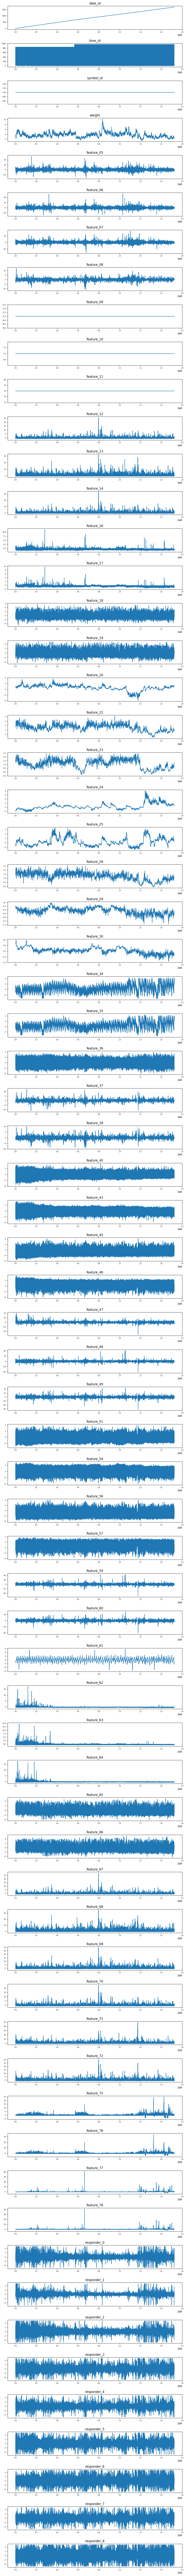

In [8]:
import matplotlib.pyplot as plt

n = data.shape[1]

fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 2*n))

for i, col in enumerate(data.columns):
    ax = axes[i]
    ax.plot(data[col])
    ax.set_title(col)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()